<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/Softmax_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
df = sns.load_dataset('iris')

In [62]:
df.head()

,sepal_length,petal_length,new
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [35]:
temp = LabelEncoder()


In [36]:
df['new'] = temp.fit_transform(df['species'])

In [37]:
df = df[['sepal_length','petal_length','new']]

In [38]:
df.sample(5)

,sepal_length,petal_length,new
128,6.4,5.6,2
14,5.8,1.2,0
65,6.7,4.4,1
136,6.3,5.6,2
10,5.4,1.5,0


In [39]:
X = df.iloc[:,:2]

In [40]:
X.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [41]:
y= df.iloc[:,-1]

In [42]:
y.sample(5)

,new
134,2
13,0
11,0
137,2
146,2


In [43]:
x_train , x_test , y_train , y_test = train_test_split(X,y , random_state=42 , test_size=0.2)

In [44]:
x_train.sample(5)

,sepal_length,petal_length
148,6.2,5.4
123,6.3,4.9
27,5.2,1.5
16,5.4,1.3
91,6.1,4.6


In [45]:
#doing logistics reg (classification)

clf = LogisticRegression(multi_class='multinomial')
#performing for softmax also called multinomial

In [46]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [47]:
y_pred = clf.predict(x_test)

In [53]:
pd.DataFrame(y_pred,columns=['predicted'] )

,predicted
0,1
1,0
2,2
3,1
4,1
5,0
6,1
7,2
8,1
9,1


In [54]:
y_test

,new
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [48]:
print(accuracy_score(y_test , y_pred))

1.0


In [55]:
pd.DataFrame(confusion_matrix(y_test , y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [57]:
#prediction

query = np.array([[5.2	,1.5]])
clf.predict_proba(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.57826286e-01, 4.21733174e-02, 3.96673488e-07]])

In [58]:
clf.predict(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

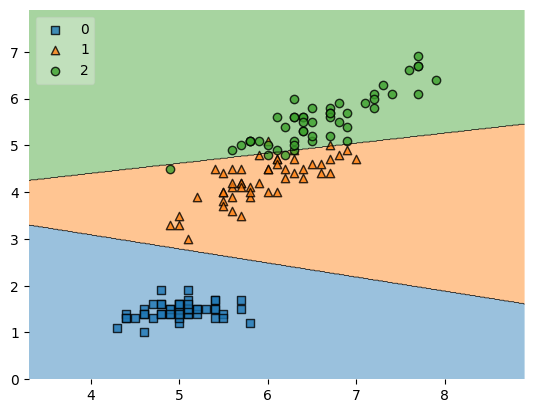

In [64]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values , y.values , clf , legend = 2)